In [1]:
#importing the libraries
import nltk
from nltk import sent_tokenize, word_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd 
from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show

In [2]:
#importing the tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# some new libraries
import string
from nltk.corpus import stopwords
from nltk.stem.porter import *
from gensim.models.phrases import Phraser, Phrases
from keras.preprocessing.text import one_hot

Using TensorFlow backend.


In [4]:
#stopwords are common word which don't hold much meaning
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Load Data

In [5]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [6]:
from nltk.corpus import gutenberg

### preprocessing the data

In [7]:
gberg_sents = gutenberg.sents()

In [8]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [9]:
# convert to lowercase
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [10]:
#removing the stopwords and punctuations
stpwrds = stopwords.words('english') + list(string.punctuation)

In [11]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
# removing the stopwords
[w.lower() for w in gberg_sents[4] if w not in stpwrds]

['she',
 'youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

In [13]:
#stem words
stemmer = PorterStemmer()
[stemmer.stem(w.lower()) for w in gberg_sents[4] if w not in stpwrds]

['she',
 'youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

In [14]:
#handling the bigram collocation
phrases = Phrases(gberg_sents)   #finding the phrases in our dataset

In [15]:
bigram = Phraser(phrases)   #creating the Phraser object for transforming sentences

In [16]:
bigram.phrasegrams   #output and score of each bigram

{'two_daughters': 11.966813731181547,
 'her_sister': 17.7960829227865,
 "'_s": 31.066242737744524,
 'very_early': 11.01214147275924,
 'Her_mother': 13.529425062715127,
 'long_ago': 63.22343628984789,
 'more_than': 29.023584433996874,
 'had_been': 22.306024648925288,
 'an_excellent': 39.063874851750626,
 'Miss_Taylor': 453.75918026073305,
 'very_fond': 24.134280468850747,
 'passed_away': 12.35053642325912,
 'too_much': 31.376002029426687,
 'did_not': 11.72841621714281,
 'any_means': 14.096964108090186,
 'wedding_-': 17.4695197740113,
 'Her_father': 13.129571562488772,
 'after_dinner': 21.528548116881705,
 'self_-': 47.79018053120332,
 'sixteen_years': 107.0461671612265,
 'five_years': 40.128755673408115,
 'years_old': 54.735425236061104,
 'seven_years': 52.59411150244507,
 'each_other': 79.4168405322873,
 'a_mile': 12.783091600264584,
 'must_be': 10.229989650632808,
 'difference_between': 220.52537305244678,
 'could_not': 10.870983286982371,
 'having_been': 11.53801833156938,
 'miles_of

In [17]:
#testing the bigram
bigram["i wanna go to New York".split()]

['i', 'wanna', 'go', 'to', 'New_York']

### Preprocessing the Corpus

In [18]:
#we are not excluding the stopwords here, just the punctuations
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w not in list(string.punctuation)])

In [19]:
lower_sents[0:4]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her']]

In [20]:
lower_bigram = Phraser(Phrases(lower_sents))

In [21]:
lower_bigram.phrasegrams

{'two_daughters': 11.080802900992637,
 'her_sister': 16.93971298099339,
 'very_early': 10.516998773665177,
 'her_mother': 10.70812618607742,
 'long_ago': 59.22644201533601,
 'more_than': 28.529926612065935,
 'had_been': 21.583193129694834,
 'an_excellent': 37.41859680854167,
 'sixteen_years': 131.42913000977518,
 'miss_taylor': 420.4340982546865,
 'mr_woodhouse': 104.19907841850323,
 'very_fond': 24.185726346489627,
 'passed_away': 11.751473221742694,
 'too_much': 30.363090173835406,
 'did_not': 10.846196223896685,
 'any_means': 14.294148100212627,
 'after_dinner': 18.60737125272944,
 'mr_weston': 91.63290824201266,
 'five_years': 37.66428596665674,
 'years_old': 48.59909444619029,
 'seven_years': 50.3345604292756,
 'each_other': 71.31277029783762,
 'well_informed': 14.185028016786626,
 'a_mile': 11.700110753652233,
 'difference_between': 207.86784241868986,
 'mrs_weston': 180.6778969011602,
 'could_not': 10.213333164207082,
 'having_been': 10.723750443105281,
 'sixteen_miles': 105.040

In [22]:
#to improve the performance of bigram we can change the minimum threshold
lower_bigram = Phraser(Phrases(lower_sents, threshold=64, min_count=32))
lower_bigram.phrasegrams

{'miss_taylor': 156.44059469941823,
 'mr_woodhouse': 82.04651843976633,
 'mr_weston': 75.87438262077481,
 'mrs_weston': 160.6848509325892,
 'great_deal': 93.36368125424357,
 'mr_knightley': 161.74131790625913,
 'miss_woodhouse': 229.03802722366902,
 'years_ago': 74.31594785893046,
 'mr_elton': 121.3990121932397,
 'dare_say': 89.94000515807346,
 'frank_churchill': 1316.4456593286038,
 'miss_bates': 276.3958829169252,
 'drawing_room': 84.91494947493561,
 'mrs_goddard': 143.57843432545658,
 'miss_smith': 73.03442128232508,
 'few_minutes': 204.16834974753786,
 'john_knightley': 83.03755747111268,
 'don_t': 250.30957446808512,
 'good_natured': 88.69936184891343,
 'few_moments': 107.77584531675087,
 'thousand_pounds': 166.51834523092802,
 'o_clock': 89.14789088153574,
 'jane_fairfax': 654.556591758761,
 'miss_fairfax': 196.19987447261062,
 'ma_am': 157.25846601094193,
 'mrs_elton': 93.08931456265867,
 'forty_years': 90.60220877269607,
 'cut_off': 129.60290535032792,
 'ten_thousand': 84.00099

In [23]:
# as in Maas et al. (2001):
# - leave in stop words ("indicative of sentiment")
# - no stemming ("model learns similar representations of words of the same stem when data suggests it")
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])

In [24]:
clean_sents[6:8]

[['sixteen',
  'years',
  'had',
  'miss_taylor',
  'been',
  'in',
  'mr_woodhouse',
  's',
  'family',
  'less',
  'as',
  'a',
  'governess',
  'than',
  'a',
  'friend',
  'very',
  'fond',
  'of',
  'both',
  'daughters',
  'but',
  'particularly',
  'of',
  'emma'],
 ['between',
  '_them_',
  'it',
  'was',
  'more',
  'the',
  'intimacy',
  'of',
  'sisters']]

### Word2vec model

In [25]:
model = Word2Vec(sentences=clean_sents, vector_size=64, sg=1, window=10, min_count=10, seed=47)

In [26]:
model.save('preprocessed_gberg_model.w2v')

### Exploring the Model

In [27]:
model = gensim.models.Word2Vec.load('preprocessed_gberg_model.w2v')

In [28]:
len(model.wv) #vocab size got reduced from 17k

10329

In [29]:
model.wv['ma_am']

array([ 0.11270832,  0.43377385,  0.04662046,  0.72464234,  0.22744162,
       -0.35688904, -0.3779393 , -0.4493949 ,  0.2314925 , -0.19521247,
       -0.47979248, -0.1440566 , -0.7665382 ,  0.25996047,  0.6667092 ,
        0.41344205,  0.0642578 ,  0.05960945,  0.28245208, -0.16200987,
        0.27134866,  0.65281147, -0.50202423, -0.14258301, -0.09507354,
        0.22988035, -0.15826572,  0.39651713, -0.412339  , -0.5109498 ,
        0.3397932 ,  0.3577951 ,  0.03046639, -0.11693345,  0.3122629 ,
        0.6708419 , -0.35670602,  0.4878904 ,  0.06286555, -0.39521864,
        0.0531484 , -0.1119856 , -0.16894427,  0.22130458, -0.1579592 ,
        0.14144303, -0.06647138,  0.10049967,  0.00568827, -0.13764198,
        0.03029719,  0.55948865, -0.23744504,  0.309687  , -0.08475238,
        0.15516719,  0.63742507,  0.00094521, -0.1998175 ,  0.19507708,
        0.68454385, -0.04201844,  0.1830839 , -0.2034869 ], dtype=float32)

In [30]:
model.wv.most_similar('ma_am')

[('betty', 0.8837676048278809),
 ('madam', 0.8430752158164978),
 ('m_sure', 0.8429846167564392),
 ('ay', 0.8173161745071411),
 ('mamma', 0.8157694339752197),
 ('p', 0.8140262365341187),
 ('civilly', 0.8135929107666016),
 ('goose', 0.8067567944526672),
 ('sha', 0.8066062927246094),
 ('.--"', 0.8030508756637573)]

In [31]:
model.wv.most_similar(positive=['father', 'woman'], negative='man')

[('husband', 0.35626092553138733),
 ('sister', 0.3550774157047272),
 ('nakedness', 0.3281550705432892),
 ('wife', 0.32003310322761536),
 ('defiled', 0.3141525685787201),
 ('womb', 0.31331130862236023),
 ('mother', 0.3022291958332062),
 ('sarah', 0.2979263663291931),
 ('rachel', 0.29510560631752014),
 ('eldest', 0.294630765914917)]

### Reducing the vector dimentionaliy

In [32]:
X = model.wv[model.wv.key_to_index]

In [33]:
tsne = TSNE(n_components=2, n_iter=1000)

In [34]:
X_2d = tsne.fit_transform(X)

In [35]:
X_2d[0:5]

array([[35.081005  ,  1.2381787 ],
       [34.86846   ,  1.0346991 ],
       [35.08319   ,  1.4296063 ],
       [34.872692  ,  0.7082758 ],
       [35.97077   , -0.34973603]], dtype=float32)

In [36]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.key_to_index

In [37]:
coords_df.head(10)

,x,y,token
0,35.081005,1.238179,the
1,34.868462,1.034699,and
2,35.083191,1.429606,of
3,34.872692,0.708276,to
4,35.970772,-0.349736,a
5,35.091114,1.506289,in
6,32.347809,-17.256802,i
7,35.386925,-1.394216,that
8,43.031994,2.519395,he
9,35.559811,-1.124618,it


In [39]:
coords_df.to_csv('preprocessed_gberg_tsne.csv', index=False)

### 2D Visualization

In [40]:
coords_df = pd.read_csv('preprocessed_gberg_tsne.csv')

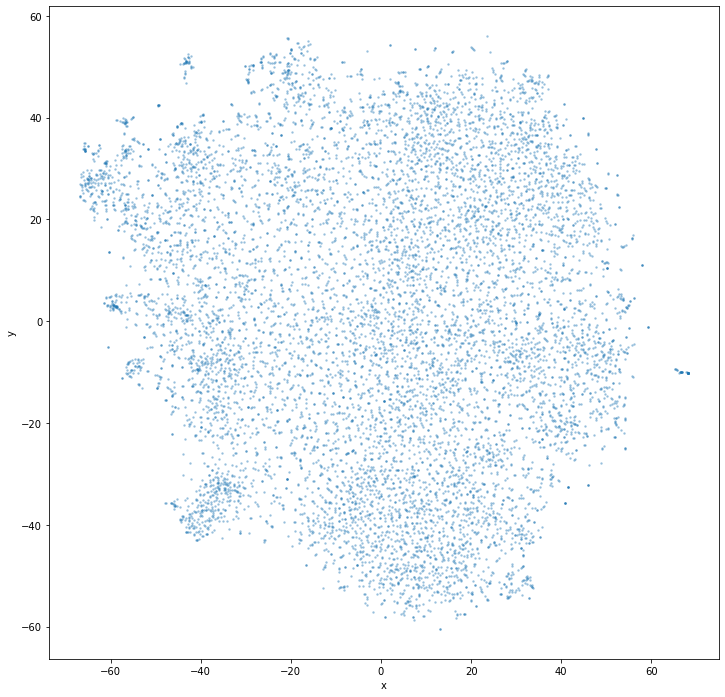

In [41]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12, 12), marker='.', s=10, alpha=0.3)

In [42]:
output_notebook()

Loading BokehJS ...

In [43]:
subset_df = coords_df.sample(n=1000)

In [44]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [45]:
show(p)

In [ ]:
from bokeh.io import export_png
export_png(p, filename="bokeh_plot.png")